In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import jieba
import gensim as gensim
import re
import sys
def flushPrint(d):
    sys.stdout.write('\r')
    sys.stdout.write(str(d))
    sys.stdout.flush()
import gensim as gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.word2vec import LineSentence
import itertools

In [2]:
def load_stopword(filename):
    '''
    加载停止词
    :return:
    '''
    with open(filename,'r',encoding='utf-8') as f:
        stopword = [line.strip() for line in f]
    return stopword

def extract(contents, stopword):
    '''
    用正则表达式去除无用内容以及停止词，保留有用的内容
    :param contents: list
    :param stopword: list
    :return:
    '''
    extracted_contents = []
    for content in contents:
        extracted_words = []
        content = str(content).strip()
        re_h = re.compile('</?\w+[^>]*>')
        re_nbsp = re.compile('&nbsp;')
        content = re_h.sub('', content)
        content = re_nbsp.sub('', content)
        words = jieba.lcut(content)
        for w in words:
            w = re.sub("[\s+\.\!\/_,$%^*(+\"\'“”《》?“]+|[+——！，。？、~@#￥%……&*（）：]+", "", w)
            if len(w)>0 and w not in stopword:
                extracted_words.append(w)
        #if len(extracted_words) > 0:
        extracted_contents.append(extracted_words)
    return extracted_contents

In [3]:
df = pd.read_csv('content_only.csv',header=None)

In [7]:
len(df)

2321

In [8]:
df.head()

,0,1
0,0,不管你是否做好准备，2020年已经真切地走到了你我面前......\n过去半年，每个人都有着...
1,1,用相机记录生活，用故事温暖人生。为此，我们开办了“疫情之下——流动女工摄影”系列课程。第一次...
2,2,姐妹，你复工了吗？孩子复课了吗？你的生活复苏了吗？刚刚过去的这个春天，你过得辛苦吗？\n广东...
3,3,插画师：楠神大人\n这次疫情让我想起了20年前的下岗。\n 一\n1999年，一个好好的家在...
4,4,我是一名来自粤西小县城的青年工作者。由于我家地处偏僻，相关的领导防控得好，没有成为疫情的“高...


In [4]:
stopword = load_stopword('stopword.txt')

In [65]:
sentence_all = []
n = 0
for a in list(df[1]):
    n+=1
    if n%100==0:
        flushPrint(n/100)
    try:
        a = a.split('\n')
        s = []
        for a_ in a:
            a_ = a_.split('。')
            extract_content = extract(a_,stopword)
    #     sentence = []
    #     for each in extract_content:
    #         sentence.extend(each)
            if extract_content:
                s.extend(extract_content)
        sentence_all.append(s)
    
    except:
        pass
    
#23

23.0

## EDA_import the trained word vectors_vectors.bin

In [7]:
word_vectors = KeyedVectors.load_word2vec_format('vectors.bin', binary=True, unicode_errors='ignore')
len(word_vectors.vocab)

1366130

In [39]:
s_p = []
n=0
for s in sentence_all:
    s_ = []
    for i in s:
        s_.append([j for j in i if j in word_vectors.vocab])
    if s_:
        s_p.append(s_)
len(s_p)

2318

In [128]:
data = []
for s in s_p:
    data+=s

## EDA_build word embeddings

In [129]:
w_model = gensim.models.word2vec.Word2Vec(size = 300, alpha=0.2,
                                    window= 5,min_count=1,sg=1,
                                    negative=2,hs=0,compute_loss = True)
w_model.build_vocab(data)

In [130]:
len(w_model.wv.vocab)

72338

In [131]:
w_model.train(data,total_examples=len(data),epochs = 100)

(140474957, 144459000)

In [149]:
w_model.wv.most_similar('工作',topn=30)

[('里程碑式', 0.640484094619751),
 ('紧张', 0.6158260703086853),
 ('模具厂', 0.6057263016700745),
 ('解释', 0.5944020748138428),
 ('商', 0.5940396785736084),
 ('符合国际', 0.5920782089233398),
 ('几倍', 0.5840386748313904),
 ('建筑工人', 0.581944465637207),
 ('土墙', 0.5810579061508179),
 ('想法', 0.5806190967559814),
 ('用工', 0.5758109092712402),
 ('管理工作', 0.5717940330505371),
 ('出发', 0.5648529529571533),
 ('防保', 0.5618619918823242),
 ('酷爱', 0.5616776943206787),
 ('清官难断', 0.5616335868835449),
 ('言情', 0.5596395134925842),
 ('强迫', 0.5592923164367676),
 ('自嘲', 0.5590623021125793),
 ('放不开', 0.5587374567985535),
 ('具体操作', 0.558506429195404),
 ('愁眉苦脸', 0.5578869581222534),
 ('没当回事', 0.5572688579559326),
 ('业余', 0.5562700033187866),
 ('小册子', 0.5552656054496765),
 ('重责', 0.5550473928451538),
 ('热爱生活', 0.5542282462120056),
 ('深思熟虑', 0.5539880394935608),
 ('凶手', 0.5535111427307129),
 ('张师傅', 0.552937388420105)]

In [150]:
word_vectors.most_similar('工作',topn=30)

[('管理工作', 0.6792691946029663),
 ('此项工作', 0.636246919631958),
 ('工作会', 0.6361050009727478),
 ('本职工作', 0.6015425324440002),
 ('在工作中', 0.5778697729110718),
 ('基层', 0.5599676966667175),
 ('基层工作', 0.5577903389930725),
 ('任务', 0.556326150894165),
 ('后勤工作', 0.5507190227508545),
 ('学习', 0.5445246696472168),
 ('干部', 0.5425925254821777),
 ('当前工作', 0.5315080285072327),
 ('职责', 0.530610203742981),
 ('工会工作', 0.5230269432067871),
 ('审计工作', 0.5200249552726746),
 ('业务培训', 0.5125687122344971),
 ('科研工作', 0.512539267539978),
 ('履职', 0.510418176651001),
 ('人事工作', 0.5084715485572815),
 ('上级', 0.5068793892860413),
 ('部门', 0.5059319138526917),
 ('岗位', 0.5040717124938965),
 ('组织协调', 0.5027644634246826),
 ('研究工作', 0.5023723840713501),
 ('搞好', 0.502034068107605),
 ('事务性', 0.5016651749610901),
 ('基层单位', 0.5013948678970337),
 ('加班加点', 0.5008909106254578),
 ('认真', 0.4996178150177002),
 ('信访工作', 0.4994402527809143)]

In [142]:
w2v_w = {w:w_model[w] for w in w_model.wv.vocab}
w2v_m = {w:word_vectors[w] for w in w_model.wv.vocab}

/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [143]:
def cosine_s(v1,v2):
    return np.sum(v1*v2)/np.sqrt(np.sum(v1*v1)+np.sum(v2*v2))

In [151]:
def most_similar(w,topn):
    s = {w:cosine_s(w2v_m[w],w2v_m[v]) for v in w2v_m if v != w}
    return sorted(s.items(), key = lambda x:x[1])[::-1][:topn]

In [153]:
most_similar('工作',30)

[('工作', 0.055294074)]

# recognize the noun

In [75]:
import jieba.posseg as pseg
N = set()
n = 0
for a in list(df[1]):
    n+=1
    if n%100 == 0:
        flushPrint(n/100)
    try:
        a = a.split('\n')
        for s in a:
            words = pseg.cut(s)
            for w in words:
                if 'n' in w.flag:
                    N.add(w.word)
    except:
        pass
    
# 23  

23.0

In [74]:
i

['做好', '2020', '年', '真切', '走', '面前']

In [76]:
s_p_n = []
n=0
for s in sentence_all:
    n+=1
    if n %100 == 0:
        flushPrint(n/100)
    s_ = []
    for i in s:
        s_.append([j for j in i if j in N and j in word_vectors.vocab])
    if s_:
        s_p_n.append(s_)
len(s_p_n)
# 23

23.0

2318

In [77]:
data = []
for s in s_p_n:
    data+=s

In [78]:
w_model = gensim.models.word2vec.Word2Vec(size = 300, alpha=0.2,
                                    window= 5,min_count=1,sg=1,
                                    negative=2,hs=0,compute_loss = True)
w_model.build_vocab(data)

In [79]:
len(w_model.wv.vocab)

39270

In [174]:
w_model.train(data,total_examples=len(data),epochs = 100)

(71537894, 75760500)

In [179]:
w_model.wv.most_similar('教授',topn=30)

[('性别比', 0.6100752353668213),
 ('传播速度', 0.5802359580993652),
 ('中国人民大学', 0.569878339767456),
 ('节选自', 0.5606749653816223),
 ('剥壳', 0.5483421087265015),
 ('工作者', 0.5381620526313782),
 ('铁建', 0.5301381349563599),
 ('学报', 0.5295753479003906),
 ('工农', 0.5250674486160278),
 ('修正', 0.5247834920883179),
 ('技术骨干', 0.5247510671615601),
 ('风向', 0.5245382189750671),
 ('法学院', 0.5231689810752869),
 ('建设者', 0.5229877233505249),
 ('童话', 0.519862174987793),
 ('人生目标', 0.5194551944732666),
 ('银行帐户', 0.5148025751113892),
 ('军国主义', 0.5146995782852173),
 ('基本国策', 0.5143409967422485),
 ('关系法', 0.5142404437065125),
 ('译者', 0.5139439105987549),
 ('爱岗敬业', 0.5105396509170532),
 ('重组', 0.5098693370819092),
 ('利用', 0.5088779926300049),
 ('修练', 0.5061289072036743),
 ('基本权利', 0.5055370330810547),
 ('李国祥', 0.5052677392959595),
 ('价值体系', 0.5050022602081299),
 ('高速度', 0.5033698081970215),
 ('龙应台', 0.5030196905136108)]

# construct the co-occurrence network

In [198]:
W = defaultdict(lambda:defaultdict(lambda:0))
n = 0
for s in data:
    n+=1
    if n%10000 == 0:
        flushPrint(n/10000)
    if len(s)>2:
        for i,j in itertools.combinations(sorted(s), 2):
            W[i][j] +=1
            W[j][i] +=1
# 11

22.0

In [199]:
x = {w:len(W[w]) for w in W}# degree
y = {w:np.sum(list(W[w].values())) for w in W}# weighted degree

In [82]:
# sort the sentence by the their degree they on the graph; descending order
sorted(x.items(),key = lambda x:x[1])[::-1][:10]

[('中', 10605),
 ('月', 8094),
 ('工作', 8060),
 ('时', 7634),
 ('孩子', 6234),
 ('生活', 6041),
 ('工人', 5885),
 ('女性', 5534),
 ('中国', 5381),
 ('社会', 5212)]

In [83]:
# sort the sentence by the their degree they on the graph; ascending order
sorted(x.items(),key = lambda x:x[1])[:10]

[('很精采', 1),
 ('色氨酸', 1),
 ('人居', 1),
 ('蜂蜜水', 1),
 ('技工学校', 1),
 ('中头', 1),
 ('反华', 1),
 ('双引号', 1),
 ('玫瑰色', 1),
 ('声音洪亮', 1)]

In [614]:
tn = np.sum(list(y.values()))

In [615]:
tn

5545064

In [200]:
P = defaultdict(lambda:defaultdict(lambda:0))
n = 0
for w in W:
    n+=1
    if n%1000 == 0:
        flushPrint(n/1000)
    for v in W[w]:
        P[w][v] = np.log2(tn*W[w][v]/(x[i]*x[j]))
# 38

38.0

In [201]:
x_ = {w:len(P[w]) for w in W}# degree
y_ = {w:np.sum(list(P[w].values())) for w in W}# weighted degree
z_ = {w:y_[w]/x_[w] for w in W}

In [163]:
# sort the noun by the aggregate pmi, descending
sorted(z_.items(),key = lambda x:x[1])[::-1][:100]

[('左丘', 10.808415898940716),
 ('局子', 10.608646386564939),
 ('活体', 10.520290512144092),
 ('礼包', 10.439645756275107),
 ('氤', 8.857325499421663),
 ('李霜', 8.857325499421663),
 ('云里', 8.490783474774071),
 ('video', 8.409866522450441),
 ('会师', 8.23614918952743),
 ('南卡', 8.037897745063484),
 ('灭绝师太', 7.857325499421663),
 ('孟非', 7.757789825870748),
 ('补药', 7.75178295160072),
 ('老舍', 7.7417837128633264),
 ('粽', 7.654030451051037),
 ('国安', 7.6508746219542365),
 ('习诗', 7.646508515645412),
 ('余杭区', 7.5353974045343),
 ('简书', 7.409866522450441),
 ('妹纸', 7.409866522450441),
 ('货单', 7.409866522450441),
 ('自愿地', 7.393087177982729),
 ('录取人数', 7.14542240405353),
 ('解密', 7.120359905255457),
 ('小妇人', 7.120359905255456),
 ('金马奖', 7.120359905255456),
 ('自由业', 7.120359905255456),
 ('延边', 7.120359905255456),
 ('铁炉', 7.120359905255456),
 ('橙', 7.090721179446868),
 ('吕延武', 7.0504349038131435),
 ('秦州', 6.974119280075167),
 ('之谜', 6.950434903813144),
 ('花期', 6.950434903813144),
 ('赛博', 6.950434903813144),
 ('游击队员'

In [89]:
# sort the noun by the aggregate pmi, ascending
sorted(z_.items(),key = lambda x:x[1])[:10]

[('南北', 3.9504349038131426),
 ('泥沼', 3.9504349038131426),
 ('伯格', 3.950434903813143),
 ('小角色', 3.9504349038131434),
 ('恐惧心理', 3.9504349038131434),
 ('芽苗菜', 3.9504349038131434),
 ('村东', 3.9504349038131434),
 ('果汁', 3.9504349038131434),
 ('滨河公园', 3.9504349038131434),
 ('康庄', 3.9504349038131434)]

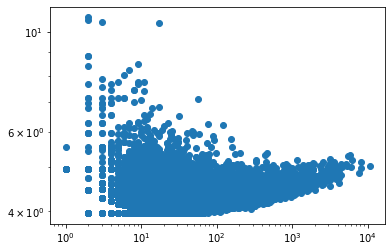

In [90]:
plt.scatter(list(x_.values()), list(z_.values()))
plt.xscale('log')
plt.yscale('log')
plt.show()

# work association with other words

In [92]:
a = '工作'## T: job
sorted([(k,v) for k,v in P[a].items()], key = lambda x:x[1])[::-1][:10]

[('工作', 14.949025333558472),
 ('时间', 13.42414065343256),
 ('工人', 13.270107024760138),
 ('中', 13.142727718283911),
 ('工厂', 13.016524094270917),
 ('生活', 12.953249919420198),
 ('公司', 12.830018153425927),
 ('孩子', 12.783324917977886),
 ('小时', 12.77380214385938),
 ('工资', 12.715306494549234)]

In [161]:
a = '京东'## T: Jindong, an online shopping platform
sorted([(k,v) for k,v in P[a].items()], key = lambda x:x[1])[::-1][:10]

[('员工', 7.5353974045343),
 ('京东', 6.950434903813144),
 ('工作', 6.5353974045343),
 ('仓库', 6.2723629987005065),
 ('员', 6.2723629987005065),
 ('有限公司', 5.950434903813144),
 ('上海', 5.950434903813144),
 ('网点', 5.950434903813144),
 ('司机', 5.950434903813144),
 ('公司', 5.950434903813144)]

# read the news2016zh

In [99]:
import random
import json

In [100]:
random.random()

0.32883053815207564

In [123]:
sentence_g = []
S = []
with open('new2016zh/news2016zh_valid.json') as f:
    for line in f:
        if random.random() < .03:#
            try:
                s = json.loads(line)['content']
                S.append(s)
                s = s.split('。')
                extract_content = extract(s,stopword)
                if extract_content:
                    sentence_g.append(extract_content)
            except:
                pass

In [124]:
import jieba.posseg as pseg
N2 = set()
n = 0
for a in S:
    n+=1
    if n%100 == 0:
        flushPrint(n/100)
    try:
        a = a.split('\n')
        for s in a:
            words = pseg.cut(s)
            for w in words:
                if 'n' in w.flag:
                    N2.add(w.word)
    except:
        pass
    
# 23  

22.0

In [125]:
len(N2)

54542

In [130]:
s_p_n_g = []
n=0
for s in sentence_g:
    n+=1
    if n %100 == 0:
        flushPrint(n/100)
    s_ = []
    for i in s:
        s_.append([j for j in i if j in N2 and j in word_vectors.vocab])
    if s_:
        s_p_n_g.append(s_)
len(s_p_n_g)
# 22

22.0

2280

In [131]:
data2 = []
for s in s_p_n_g:
    data2+=s

In [132]:
w_model_g = gensim.models.word2vec.Word2Vec(size = 300, alpha=0.2,
                                    window= 5,min_count=1,sg=1,
                                    negative=2,hs=0,compute_loss = True)
w_model_g.build_vocab(data2)

In [133]:
len(w_model_g.wv.vocab)

42511

In [134]:
W2 = defaultdict(lambda:defaultdict(lambda:0))
n = 0
for s in data2:
    n+=1
    if n%10000 == 0:
        flushPrint(n/10000)
    if len(s)>2:
        for i,j in itertools.combinations(sorted(s), 2):
            W2[i][j] +=1
            W2[j][i] +=1
# 4

4.0

In [135]:
x2 = {w:len(W2[w]) for w in W2}# degree
y2 = {w:np.sum(list(W2[w].values())) for w in W2}# weighted degree

In [136]:
# sort the sentence by the their degree they on the graph; descending order
sorted(x2.items(),key = lambda x:x[1])[::-1][:10]

[('中', 13550),
 ('中国', 8921),
 ('时', 7739),
 ('公司', 5674),
 ('新', 5668),
 ('时间', 5613),
 ('发展', 5493),
 ('工作', 5378),
 ('前', 4985),
 ('市场', 4830)]

In [137]:
# sort the sentence by the their degree they on the graph; ascending order
sorted(x2.items(),key = lambda x:x[1])[:10]

[('金锁', 1),
 ('善攻者', 1),
 ('性灵', 1),
 ('风会', 1),
 ('警示灯', 2),
 ('吉安', 2),
 ('剃度', 2),
 ('古寺', 2),
 ('华严经', 2),
 ('地藏经', 2)]

In [612]:
tn2 = np.sum(list(y2.values()))

In [613]:
tn2

12504020

In [616]:
np.log2(tn2/tn)

1.1731159741337909

In [194]:
P2 = defaultdict(lambda:defaultdict(lambda:0))
n = 0
for w in W2:
    n+=1
    if n%1000 == 0:
        flushPrint(n/1000)
    for v in W2[w]:
        P2[w][v] = np.log2(tn2*W2[w][v]/(x2[i]*x2[j]))
# 42

42.0

In [141]:
x2_ = {w:len(P2[w]) for w in W2}# degree
y2_ = {w:np.sum(list(P2[w].values())) for w in W2}# weighted degree
z2_ = {w:y2_[w]/x2_[w] for w in W2}

In [164]:
# sort the noun by the aggregate pmi, descending
sorted(z2_.items(),key = lambda x:x[1])[::-1][:100]

[('棉花价格', 22.37729542529406),
 ('国家税务局', 22.20126887759617),
 ('n', 21.862250522737593),
 ('正太', 21.369358723485266),
 ('y', 21.27962816163137),
 ('zh', 21.107407813838925),
 ('j', 20.915914775714743),
 ('o', 20.88549905333226),
 ('科员', 20.830117493872628),
 ('sh', 20.58330474436528),
 ('ch', 20.58330474436528),
 ('宠物医院', 20.565988578998017),
 ('u', 20.118761215910617),
 ('describe', 20.0685298790097),
 ('ji', 20.058104927216),
 ('发售日期', 20.056444832500762),
 ('后排', 20.001871128179623),
 ('郑州市', 19.934650155530402),
 ('称雄', 19.92872394849218),
 ('专论', 19.892171973286846),
 ('d', 19.828515478220595),
 ('盘式', 19.827158464875062),
 ('r', 19.735632011597268),
 ('xi', 19.735170374732494),
 ('qi', 19.735170374732494),
 ('q', 19.735170374732494),
 ('有奖', 19.72691412870642),
 ('座椅', 19.637117618748675),
 ('you', 19.612107061139746),
 ('后视镜', 19.608665995931357),
 ('public', 19.605907711943868),
 ('sex', 19.58219744662804),
 ('age', 19.58219744662804),
 ('铝合金', 19.577355937936005),
 ('z', 19.57

In [143]:
# sort the noun by the aggregate pmi, descending
sorted(z2_.items(),key = lambda x:x[1])[:10]

[('老年性', 15.183571232454781),
 ('戏剧化', 15.183571232454781),
 ('古典文学', 15.183571232454781),
 ('火炉', 15.183571232454781),
 ('四纵', 15.183571232454781),
 ('武装冲突', 15.183571232454781),
 ('陨落', 15.183571232454781),
 ('姿色', 15.183571232454781),
 ('孟云', 15.183571232454781),
 ('才气', 15.183571232454781)]

In [226]:
a = '工作'## T: job
sorted([(k,v) for k,v in P2[a].items()], key = lambda x:x[1])[::-1][:10]

[('工作', 23.958358292055962),
 ('中', 22.820195852998438),
 ('公司', 22.312854249399752),
 ('单位', 22.090461828063304),
 ('中国', 22.07838899576273),
 ('发展', 21.841782715206584),
 ('时间', 21.753426840785735),
 ('生活', 21.753426840785735),
 ('情况', 21.753426840785735),
 ('建设', 21.609835987156885)]

In [162]:
a = '京东'## T: city
sorted([(k,v) for k,v in P2[a].items()], key = lambda x:x[1])[::-1][:10]

[('京东', 22.88401095059588),
 ('乡村', 21.160851155954703),
 ('推广员', 20.827427422229512),
 ('花椒', 20.675424328784462),
 ('电商', 20.57588865523355),
 ('平台', 20.271034073705128),
 ('阿里', 20.271034073705128),
 ('农村', 20.13776754284166),
 ('腾讯', 20.090461828063304),
 ('干辣椒', 20.090461828063304)]

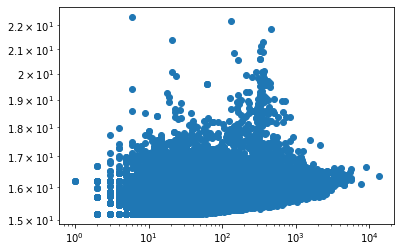

In [146]:
plt.scatter(list(x2_.values()), list(z2_.values()))
plt.xscale('log')
plt.yscale('log')
plt.show()

# the change of meaning of words

In [180]:
import scipy.stats

In [165]:
len(N.intersection(N2))

22736

In [202]:
#int_N = list(N.intersection(N2))
int_N = list(set(list(z_.keys())).intersection(set(list(z2_.keys()))))

In [203]:
len(z_),len(z2_),len(int_N)

(38139, 42131, 20837)

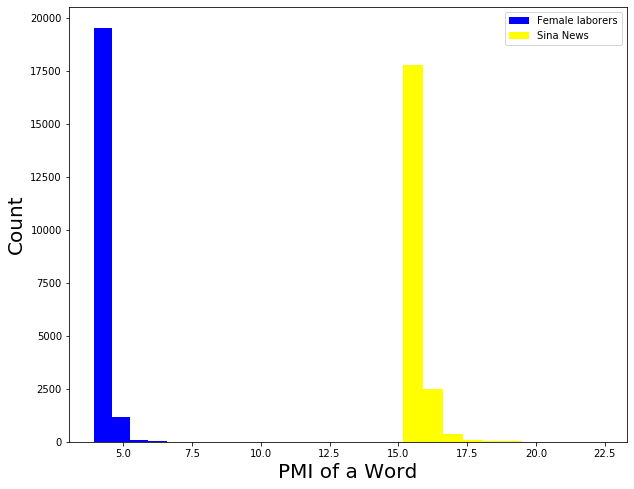

In [624]:
plt.figure(figsize=(10,8))
pmi_1 = [z_[i] for i in int_N]
pmi_2 = [z2_[i] for i in int_N]
plt.hist(pmi_1, color='blue', label = 'Female laborers')
plt.hist(pmi_2, color= 'yellow', label = 'Sina News')
plt.legend()
plt.xlabel('PMI of a Word', size=20)
plt.ylabel('Count',size = 20)
plt.savefig('pmi_distribution.png',dpi = 600)
plt.show()

In [225]:
CW = {}
n = 0
for w in int_N:
    n+=1
    if n%1000 == 0:
        flushPrint(n/1000)
    neb = [i for i in P[w] if (i in int_N and i in P2[w])]
    if len(neb)>5:
        r1 = [P[w][i] for i in neb]
        r2 = [P2[w][i] for i in neb]
        cor = scipy.stats.spearmanr(r1,r2)[0]
        if np.isnan(cor):
            continue
        CW[w] = cor
# 20

/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


20.0

In [270]:
sorted(CW.items(), key = lambda x:x[1])[:100]

[('作案', -0.9486832980505139),
 ('助推', -0.9000000000000001),
 ('寨', -0.9000000000000001),
 ('环球', -0.8660254037844386),
 ('有奖', -0.8355727485873495),
 ('城镇职工', -0.8263342440128466),
 ('府', -0.8215838362577491),
 ('涂料', -0.8040302522073696),
 ('顺德区', -0.7666666666666669),
 ('调试', -0.7022468831767833),
 ('公共设施', -0.7),
 ('协作', -0.6735753140545634),
 ('负增长', -0.6708203932499369),
 ('私有化', -0.6708203932499369),
 ('跌幅', -0.6627334956636112),
 ('祥和', -0.6627334956636112),
 ('署', -0.6572670690061994),
 ('直线', -0.6572670690061994),
 ('壁垒', -0.6572670690061994),
 ('指挥部', -0.6546536707079772),
 ('创业项目', -0.6546536707079772),
 ('模型', -0.6448540056198467),
 ('学术界', -0.632455532033676),
 ('督查', -0.6236095644623236),
 ('观澜', -0.6211299937499415),
 ('行列', -0.6210590034081188),
 ('银', -0.6063390625908325),
 ('知情', -0.6049764346102502),
 ('扬州', -0.5916079783099617),
 ('教官', -0.5879447357921312),
 ('形状', -0.5855400437691198),
 ('智能家居', -0.5832493478987067),
 ('定罪', -0.5768448664935834),
 ('业余', -0.571428

In [274]:
CW['时间']

0.3379863149049689

In [229]:
sorted(CW.items(), key = lambda x:x[1])[::-1][:100]

[('坑人', 1.0),
 ('攻坚', 1.0),
 ('父', 1.0),
 ('准则', 1.0),
 ('体贴', 1.0),
 ('偏向', 1.0),
 ('蜂蜜', 1.0),
 ('脸颊', 1.0),
 ('杯子', 0.9999999999999999),
 ('笑声', 0.9999999999999999),
 ('孙', 0.9999999999999999),
 ('实际收入', 0.9999999999999998),
 ('牙膏', 0.9999999999999998),
 ('强力', 0.9860132971832694),
 ('活生生', 0.9860132971832694),
 ('条约', 0.9860132971832694),
 ('子弹', 0.9797958971132713),
 ('培训费', 0.9797958971132713),
 ('头晕', 0.9591836734693876),
 ('org', 0.9558988911273407),
 ('科室', 0.9428090415820635),
 ('情商', 0.9241455716126523),
 ('友情', 0.893010836681381),
 ('中铁', 0.8861862597425679),
 ('钢琴', 0.8846517369293828),
 ('外籍', 0.8823529411764706),
 ('供需', 0.876360240468927),
 ('dv', 0.875),
 ('菩萨', 0.873862897505303),
 ('副总', 0.8703882797784891),
 ('黑桥', 0.870388279778489),
 ('兵', 0.8660254037844386),
 ('经济学家', 0.8620436566990364),
 ('影视作品', 0.85923294280422),
 ('乳腺癌', 0.8574929257125441),
 ('双休', 0.8557415050527782),
 ('旅游业', 0.8541985556144386),
 ('长三角', 0.8501272771022874),
 ('购房者', 0.8466068268482456)

In [316]:
w = '时间'
neb = [i for i in P[w] if (i in int_N and i in P2[w])]
if len(neb)>5:
    r1 = [P[w][i] for i in neb]
    r2 = [P2[w][i] for i in neb]
    cor = scipy.stats.spearmanr(r1,r2)[0]

In [320]:
w = '女性'
neb = [i for i in P[w] if (i in int_N and i in P2[w])]
if len(neb)>5:
    r1 = [P[w][i] for i in neb]
    r2 = [P2[w][i] for i in neb]
    cor = scipy.stats.spearmanr(r1,r2)[0]

In [321]:
cor

0.26396854980377493

In [319]:
neb

['双休',
 '工作',
 '弹性',
 '感兴趣',
 '地方',
 '小朋友',
 '散步',
 '朋友',
 '空闲',
 '上车',
 '走',
 '记录',
 '孩子',
 '见面',
 '小区',
 '新闻',
 '来源',
 '消息',
 '深圳',
 '资讯',
 '价值',
 '劳动',
 '女性',
 '家人',
 '市场',
 '烧菜',
 '上门',
 '大哥',
 '精力',
 '回家',
 '点儿',
 '问',
 '信息',
 '医生',
 '医院',
 '床位',
 '手术',
 '浪费',
 '钱',
 '评论',
 '软件',
 '量',
 '小说',
 '总会',
 '天',
 '工厂',
 '期',
 '制度性',
 '原因',
 '外界',
 '村',
 '程序',
 '时机',
 '公司',
 '计划',
 '周',
 '关系',
 '学业',
 '年龄',
 '指数',
 '漫长',
 '中',
 '思路',
 '方向',
 '痛苦',
 '目标',
 '目的地',
 '盲目',
 '管理',
 '经验',
 '职业',
 '过程',
 '发展',
 '书',
 '事情',
 '时间',
 '宣传',
 '志愿者',
 '社区',
 '闲暇',
 '生命',
 '劳动节',
 '国际',
 '习惯',
 '新',
 '家务',
 '密集',
 '情绪',
 '前',
 '口',
 '电梯',
 '明白',
 '讲',
 '广州',
 '证明',
 '领导',
 '分',
 '办',
 '影响',
 '笑',
 '酒店',
 '长',
 '东西',
 '令',
 '少',
 '恐惧',
 '手机',
 '宝宝',
 '生产',
 '市',
 '指挥部',
 '口罩',
 '营业时间',
 '食物',
 '住',
 '开学',
 '母亲',
 '记者',
 '韩国',
 '亲人',
 '妇女',
 '宝贵',
 '家庭',
 '社交',
 '风险',
 '办公室',
 '情况',
 '内容',
 '动画片',
 '妈妈',
 '日记',
 '玩',
 '玩具',
 '画画',
 '太',
 '感觉',
 '生活',
 '武汉',
 '大胆',
 '客户',
 '家',
 '整理',
 '货物',
 '坐火车',
 '事实'

In [255]:
neb
neb_ = ["old-age Insurance" , "treatment" , "old-age pension" , "urban workers" , "average wage" , "current"]

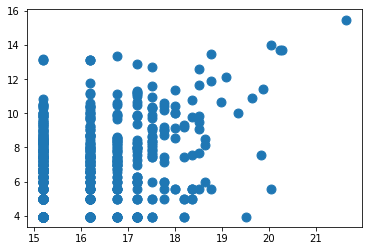

In [322]:
plt.scatter(r2,r1,s = 80)
# for i,w in enumerate(neb):
#     plt.text(r2[i],r1[i],neb_[i])
plt.show()

In [259]:
w = '钢琴'
neb = [i for i in P[w] if (i in int_N and i in P2[w])]
if len(neb)>5:
    r1 = [P[w][i] for i in neb]
    r2 = [P2[w][i] for i in neb]
    cor = scipy.stats.spearmanr(r1,r2)[0]

In [262]:
neb = ['钢琴','大学', '学校', '音乐', '塞进', '教育', '母亲']
neb_ = ['piano','university' , 'school' , 'music' , 'stuff' , 'education' , 'mother']

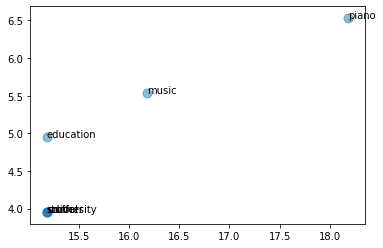

In [269]:
plt.scatter(r2,r1,s = 80,alpha = 0.5)
for i,w in enumerate(neb):
    plt.text(r2[i],r1[i],neb_[i])
plt.show()
# plt.xlabel('Xinlang pmi',size = 20)
# plt.ylabel('Jianjiao pmi',size = 20)
# plt.title('Piano',size =20)

# add adj. and verb, adv. to our vocabulary networks

In [335]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets


import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [365]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim,w_en):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(w_en[word], (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 20)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

In [354]:
def makeDF(model, word_list):
    p = []
    v = []
    for word in word_list:
        #g.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        p.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Pride.reshape(1,-1))[0][0])
        #v.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), value.reshape(1,-1))[0][0])
        #s.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Safety.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'pride': p}, index = word_list)
    return df

In [338]:
def normalize(vector):
    #if np.linalg.norm(vector) == 0:
        #print(vector)
    normalized_vector = vector / np.sqrt(np.sum(vector*vector))
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [323]:
import jieba.posseg as pseg
N_ = set()
n = 0
for a in list(df[1]):
    n+=1
    if n%100 == 0:
        flushPrint(n/100)
    try:
        a = a.split('\n')
        for s in a:
            words = pseg.cut(s)
            for w in words:
                if 'n' in w.flag or 'a' in w.flag:
                    N_.add(w.word)
    except:
        pass
    
# 23  

23.0

In [503]:
len(sentence_g)

2280

In [502]:
n = 0
for s in sentence_g:
    for i in s:
        n += 1
        if n == 10:
            break
        if '钢琴' in i:
            print(i,'\n')

['1993', '年', '第一名', '成绩', '毕业', '上海音乐学院', '钢琴', '作曲系'] 

['见过', '李泉', '最深', '印象', '钢琴'] 

['钢琴', '之于', '剑', '之于', '骑士', '花之于', '少女', '月', '之于', '星河'] 

['音感', '罗小白', '爆料', '说', '小时候', '音痴', '钢琴', 'Do', '找', '不到', '罗小白现', '上行', '娱乐', '旗下', '艺人', '受邀', '国内', '小型', '活动', '国外', '演出', '更是', '屡见不鲜', '出书', '近期', '发行', 'EP', '举办', '众筹', '活动', '预计', '开', '大型', '音乐会'] 

['大学', '时', '音乐', '天赋', '钢琴', '管风琴', '大提琴'] 

['钢琴', '创造', '管弦乐', '效果', '首创', '背谱', '演奏法', '钢琴', '巨大贡献', '钢琴', '之王', '美称'] 

['2015', '年', '月', '25', '日', '21', '时许', '司机', '方某', '驾驶', '一辆', '牌照', '为津', 'RG8363', '江铃', '面包车', '张', '驾驶', '津', 'RN7836', '长安', '越野', '吉普车', '武清区', '京沪', '高速', '北京', '方向', '发生', '追尾', '碰撞', '面包车', '车辆', '及车', '钢琴', '高档', '红木家具', '受损', '方某', '中国', '人寿', '财产', '保险公司', '索赔', '人民币', '138720', '元'] 

['老方', '先是', '赶集网', '搜索', '武警', '附属', '医院', '旁边', '一家', '钢琴', '学校', '二手钢琴', '斥资', '万元', '买', '一架', '二手钢琴', '二人', '前往', '河北省', '大城县', '花', '4000', '元', '买', '一对', '假', '红木', '圈椅'] 

['凑足', '装备', '案发', '当晚', '老方

In [501]:
n = 0
for s in sentence_all:
    for i in s:
        n += 1
        if n == 10:
            break
        if '钢琴' in i:
            print(i,'\n')

['陈嘉玲', '妈妈', '孩子', '写', '作业', '鸡毛掸子', '满屋子', '追', '会斥', '巨资', '女儿', '去学', '钢琴', '优越感', '懂得', '儿女', '快乐', '发现', '女儿', '学', '钢琴', '快乐', '狠下心来', '斥', '巨资', '买', '回家', '钢琴', '高级', '置物架'] 

['四所', '学校', '中', '长春', '大学', '开设', '面向', '视障', '学生', '音乐', '表演', '专业', '北京联合大学', '开设', '钢琴', '调率', '专业', '针灸', '推拿', '专业'] 

['外语翻译', '心理咨询', '钢琴', '调率', '速录', '客服', '坐席', '特殊教育', 'NGO', '网店', '经营', '品牌', '公关'] 

['很小', '阿宛', '该学', '东西', '选', '钢琴', '舞蹈', '我选'] 

['一家', '三口', '五口', '电视机', '电冰箱', '床铺', '钢琴', '塞进', '屋里', '拾掇', '有条有理', '日夜', '生活', '其间', '蜗居'] 

['相比', '户', '卓', '家', '比令', '居大', '平米', '女儿', '购置', '一台', '钢琴'] 

['重点', '小学', '重点中学', '师资', '力量', '城市', '家庭教育', '遗传', '因素', '父母', '受', '教育', '水平', '家庭', '经济', '条件', '影响', '子女', '教育', '城里', '小朋友', '学', '钢琴', '英语', '马术', '出国', '旅游', '补习班', '农村', '小朋友', '见到', '东西'] 

['城里', '音乐', '老师', '好心肠', '劝慰', '钱绒', '母亲', '学', '钢琴', '手指', '长', '细'] 

['贾姨吹', '萨克斯', '高雅', '音乐', '钢琴', '小提琴'] 



In [324]:
len(N_)

51510

In [325]:
import jieba.posseg as pseg
N2_ = set()
n = 0
for a in S:
    n+=1
    if n%100 == 0:
        flushPrint(n/100)
    try:
        a = a.split('\n')
        for s in a:
            words = pseg.cut(s)
            for w in words:
                if 'n' in w.flag or 'a' in w.flag:
                    N2_.add(w.word)
    except:
        pass
    
# 23  

22.0

In [326]:
len(N2_)

56781

In [328]:
int_N_ = list(N_.intersection(N2_))
len(int_N_)

24342

In [329]:
s_p_n = []
n=0
for s in sentence_all:
    n+=1
    if n %100 == 0:
        flushPrint(n/100)
    s_ = []
    for i in s:
        s_.append([j for j in i if j in int_N_ and j in word_vectors.vocab])
    if s_:
        s_p_n.append(s_)
len(s_p_n)
# 23

23.0

2318

In [330]:
data = []
for s in s_p_n:
    data+=s

In [331]:
w_model = gensim.models.word2vec.Word2Vec(size = 300, alpha=0.2,
                                    window= 5,min_count=1,sg=1,
                                    negative=2,hs=0,compute_loss = True)
w_model.build_vocab(data)

In [332]:
len(w_model.wv.vocab)

22853

In [333]:
w_model.train(data,total_examples=len(data),epochs = 100)

(68308881, 72507100)

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
PlotDimension(ax1, df, 'price')
ax2 = fig.add_subplot(122)
PlotDimension(ax2, df, 'value')
plt.savefig('price_dimension.jpg',format='jpg',dpi = 400)
plt.show()

In [606]:
Pride = dimension(w_model, ['笑声','笑','快乐'], ['无聊','琐碎','混日子'])


/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [607]:
'' in w_model.wv.vocab

False

In [608]:
x_['生活']

6041

In [625]:
words_list = ['工作','生活','家庭']

In [626]:
df = makeDF(w_model, words_list) 

/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [627]:
df

,pride
工作,0.041388
生活,0.007864
家庭,-0.117573


In [374]:
w_en = {'工作':'job','生活':'life','家庭':'family'}

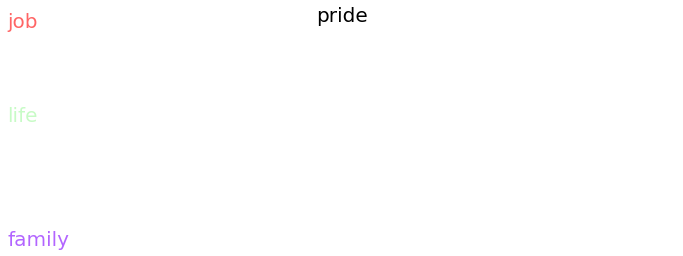

In [375]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(111)
PlotDimension(ax1, df, 'pride',w_en)
# ax2 = fig.add_subplot(122)
# PlotDimension(ax2, df, 'value')
# plt.savefig('price_dimension.jpg',format='jpg',dpi = 400)
plt.show()

In [386]:
s_p_n_g = []
n=0
for s in sentence_g:
    n+=1
    if n %100 == 0:
        flushPrint(n/100)
    s_ = []
    for i in s:
        s_.append([j for j in i if j in int_N_ and j in word_vectors.vocab])
    if s_:
        s_p_n_g.append(s_)
len(s_p_n_g)
# 23

22.0

2280

In [387]:
data2 = []
for s in s_p_n_g:
    data2+=s

In [388]:
w_model_g = gensim.models.word2vec.Word2Vec(size = 300, alpha=0.2,
                                    window= 5,min_count=1,sg=1,
                                    negative=2,hs=0,compute_loss = True)
w_model_g.build_vocab(data2)

In [389]:
len(w_model_g.wv.vocab)

22852

In [392]:
w_model_g.train(data,total_examples=len(data),epochs = 100)

(71250967, 72507100)

In [629]:
df = makeDF(w_model_g, words_list) 

/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/Users/linyiling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [630]:
df

,pride
工作,-0.045080
生活,-0.044342
家庭,0.004001


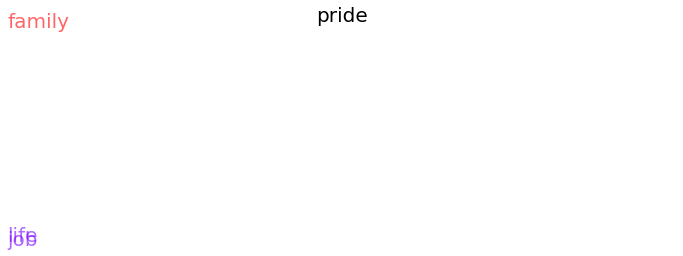

In [631]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(111)
PlotDimension(ax1, df, 'pride',w_en)
# ax2 = fig.add_subplot(122)
# PlotDimension(ax2, df, 'value')
# plt.savefig('price_dimension.jpg',format='jpg',dpi = 400)
plt.show()

In [506]:
len(W)

38139